In [7]:
# Cell 1: Imports and Constants
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import random

# Constants
MIN_AGE = 18
MAX_AGE = 70
MIN_WEIGHT = 40.0
MAX_WEIGHT = 120.0
MIN_FITNESS = 1
MAX_FITNESS = 10

In [8]:
# Cell 2: Helper Functions for Random Input Generation
def random_gender():
    return random.choice([0, 1])  # 0 = female, 1 = male

def random_age():
    return random.randint(MIN_AGE, MAX_AGE)

def random_weight():
    return random.uniform(MIN_WEIGHT, MAX_WEIGHT)

def random_fitness():
    return random.randint(MIN_FITNESS, MAX_FITNESS)

def random_injury_history():
    # Most people will have low injury scores (0-3)
    return min(10, random.randint(0, 3) + random.randint(0, 3))

def random_nutrition():
    # Slightly skewed toward better nutrition (4-8)
    return max(1, min(10, 5 + random.randint(-1, 5)))

def random_sleep_hours():
    # Normally distributed around 7 hours
    return max(4, min(10, int(random.gauss(7, 1.5))))

def random_water_intake():
    return random.uniform(1.0, 5.0)  # 1-5 liters

def random_supplement_use():
    return 1 if random.random() < 0.3 else 0  # 30% use supplements

def random_training_freq():
    # Most people train 2-5 days/week
    return max(1, min(7, 3 + random.randint(0, 2)))

def random_running_experience():
    # Exponential distribution - more beginners than experts
    return min(999, int(random.expovariate(1/50)))

def random_inactivity_period():
    # Most runners are either active or recently inactive
    return random.randint(0, 30) if random.random() < 0.7 else 30 + random.randint(0, 70)

In [9]:
# Cell 3: Fuzzy System Setup
# Input variables
genero = ctrl.Antecedent(np.arange(0, 2, 1), 'GENERO')
edad = ctrl.Antecedent(np.arange(18, 71, 1), 'EDAD')
peso = ctrl.Antecedent(np.arange(40, 121, 1), 'PESO')
condicion_fisica = ctrl.Antecedent(np.arange(1, 11, 1), 'CONDICION_FISICA')
historia_lesiones = ctrl.Antecedent(np.arange(0, 11, 1), 'HISTORIA_LESIONES')
nutricion = ctrl.Antecedent(np.arange(1, 11, 1), 'NUTRICION')
horas_sueno = ctrl.Antecedent(np.arange(4, 11, 1), 'HORAS_SUENO')
consumo_agua = ctrl.Antecedent(np.arange(1, 6, 1), 'CONSUMO_AGUA')
uso_suplementos = ctrl.Antecedent(np.arange(0, 2, 1), 'USO_SUPLEMENTOS')
frecuencia_entrenamiento = ctrl.Antecedent(np.arange(1, 8, 1), 'FRECUENCIA_ENTRENAMIENTO')
tiempo_corriendo = ctrl.Antecedent(np.arange(0, 1000, 1), 'TIEMPO_CORRIENDO')
tiempo_sin_correr = ctrl.Antecedent(np.arange(0, 100, 1), 'TIEMPO_SIN_CORRER')

# Output variable
meta_a_correr = ctrl.Consequent(np.arange(0, 6, 0.1), 'META_A_CORRER')

In [13]:
# Cell 4: Membership Functions
# Gender (0 = female, 1 = male)
genero['MUJER'] = fuzz.trimf(genero.universe, [0, 0, 1])
genero['HOMBRE'] = fuzz.trimf(genero.universe, [0, 1, 1])

# Age
edad['NINO'] = fuzz.trimf(edad.universe, [5, 5, 12])
edad['ADOLESCENTE'] = fuzz.trimf(edad.universe, [10, 18, 25])
edad['JOVEN_ADULTO'] = fuzz.trimf(edad.universe, [20, 30, 40])
edad['ADULTO'] = fuzz.trimf(edad.universe, [35, 50, 60])
edad['MAYOR'] = fuzz.trimf(edad.universe, [55, 70, 70])

# Weight
peso['MUY_LIVIANO'] = fuzz.trimf(peso.universe, [20, 35, 35])
peso['LIVIANO'] = fuzz.trimf(peso.universe, [30, 50, 60])
peso['NORMAL'] = fuzz.trimf(peso.universe, [50, 70, 85])
peso['SOBREPESO'] = fuzz.trimf(peso.universe, [75, 95, 110])
peso['OBESO'] = fuzz.trimf(peso.universe, [100, 120, 120])

# Fitness level
condicion_fisica['MUY_MALA'] = fuzz.trimf(condicion_fisica.universe, [1, 1, 2])
condicion_fisica['MALA'] = fuzz.trimf(condicion_fisica.universe, [1, 3, 5])
condicion_fisica['REGULAR'] = fuzz.trimf(condicion_fisica.universe, [4, 6, 7])
condicion_fisica['BUENA'] = fuzz.trimf(condicion_fisica.universe, [6, 8, 9])
condicion_fisica['EXCELENTE'] = fuzz.trimf(condicion_fisica.universe, [8, 10, 10])

# Injury history
historia_lesiones['NINGUNA'] = fuzz.trimf(historia_lesiones.universe, [0, 0, 2])
historia_lesiones['LEVE'] = fuzz.trimf(historia_lesiones.universe, [1, 4, 6])
historia_lesiones['MODERADA'] = fuzz.trimf(historia_lesiones.universe, [5, 7, 9])
historia_lesiones['GRAVE'] = fuzz.trimf(historia_lesiones.universe, [8, 10, 10])

# Nutrition
nutricion['MALA'] = fuzz.trimf(nutricion.universe, [1, 1, 3])
nutricion['REGULAR'] = fuzz.trimf(nutricion.universe, [2, 5, 7])
nutricion['BUENA'] = fuzz.trimf(nutricion.universe, [6, 8, 10])

# Sleep hours
horas_sueno['INSUFICIENTE'] = fuzz.trimf(horas_sueno.universe, [4, 4, 5])
horas_sueno['MINIMO'] = fuzz.trimf(horas_sueno.universe, [4, 6, 7])
horas_sueno['ADECUADO'] = fuzz.trimf(horas_sueno.universe, [6, 8, 9])
horas_sueno['EXCESIVO'] = fuzz.trimf(horas_sueno.universe, [8, 10, 10])

# Water intake
consumo_agua['BAJO'] = fuzz.trimf(consumo_agua.universe, [1, 1, 2])
consumo_agua['MODERADO'] = fuzz.trimf(consumo_agua.universe, [1, 3, 4])
consumo_agua['ALTO'] = fuzz.trimf(consumo_agua.universe, [3, 5, 5])

# Supplement use
uso_suplementos['NO'] = fuzz.trimf(uso_suplementos.universe, [0, 0, 1])
uso_suplementos['SI'] = fuzz.trimf(uso_suplementos.universe, [0, 1, 1])

# Training frequency
frecuencia_entrenamiento['NUNCA'] = fuzz.trimf(frecuencia_entrenamiento.universe, [0, 1, 1])
frecuencia_entrenamiento['OCASIONAL'] = fuzz.trimf(frecuencia_entrenamiento.universe, [0, 2, 3])
frecuencia_entrenamiento['MODERADO'] = fuzz.trimf(frecuencia_entrenamiento.universe, [2, 4, 5])
frecuencia_entrenamiento['FRECUENTE'] = fuzz.trimf(frecuencia_entrenamiento.universe, [4, 6, 7])
frecuencia_entrenamiento['DIARIO'] = fuzz.trimf(frecuencia_entrenamiento.universe, [6, 7, 7])

# Running experience
tiempo_corriendo['PRINCIPIANTE'] = fuzz.trimf(tiempo_corriendo.universe, [0, 0, 90])
tiempo_corriendo['INTERMEDIO'] = fuzz.trimf(tiempo_corriendo.universe, [60, 180, 365])
tiempo_corriendo['EXPERTO'] = fuzz.trimf(tiempo_corriendo.universe, [300, 365, 999])

# Time without running
tiempo_sin_correr['ACTIVO'] = fuzz.trimf(tiempo_sin_correr.universe, [0, 0, 30])
tiempo_sin_correr['INACTIVO_RECIENTE'] = fuzz.trimf(tiempo_sin_correr.universe, [20, 90, 180])
tiempo_sin_correr['INACTIVO_PROLONGADO'] = fuzz.trimf(tiempo_sin_correr.universe, [150,250, 365])

# Running goal output
meta_a_correr['CAMINAR'] = fuzz.trimf(meta_a_correr.universe, [0, 0, 1])
meta_a_correr['CORRER_1KM'] = fuzz.trimf(meta_a_correr.universe, [0.5, 1, 1.5])
meta_a_correr['CORRER_5KM'] = fuzz.trimf(meta_a_correr.universe, [1.5, 2, 2.5])
meta_a_correr['CORRER_10KM'] = fuzz.trimf(meta_a_correr.universe, [2.5, 3, 3.5])
meta_a_correr['MEDIA_MARATON'] = fuzz.trimf(meta_a_correr.universe, [3.5, 4, 4.5])
meta_a_correr['MARATON'] = fuzz.trimf(meta_a_correr.universe, [4.5, 5, 5.5])

In [14]:
# Cell 5: Fuzzy Rules
rules = [
    # Physical condition rules
    ctrl.Rule(condicion_fisica['EXCELENTE'] & edad['JOVEN_ADULTO'] & 
             historia_lesiones['NINGUNA'], meta_a_correr['MARATON']),
    ctrl.Rule(condicion_fisica['BUENA'] & edad['ADULTO'] & 
             historia_lesiones['LEVE'], meta_a_correr['CORRER_10KM']),
    ctrl.Rule(condicion_fisica['REGULAR'] & edad['ADOLESCENTE'], 
             meta_a_correr['CORRER_5KM']),
    ctrl.Rule(condicion_fisica['MALA'] | edad['MAYOR'], 
             meta_a_correr['CAMINAR']),
    ctrl.Rule(condicion_fisica['MUY_MALA'], meta_a_correr['CAMINAR']),
    ctrl.Rule(peso['OBESO'] & condicion_fisica['MALA'], 
             meta_a_correr['CAMINAR']),
    ctrl.Rule(peso['SOBREPESO'] & nutricion['BUENA'], 
             meta_a_correr['CORRER_1KM']),
    ctrl.Rule(peso['NORMAL'] & nutricion['BUENA'], 
             meta_a_correr['CORRER_5KM']),
    ctrl.Rule(peso['LIVIANO'] & nutricion['BUENA'], 
             meta_a_correr['CORRER_10KM']),
    
    # Training experience rules
    ctrl.Rule(frecuencia_entrenamiento['DIARIO'] & 
             tiempo_corriendo['EXPERTO'], meta_a_correr['MARATON']),
    ctrl.Rule(frecuencia_entrenamiento['FRECUENTE'] & 
             tiempo_corriendo['INTERMEDIO'], meta_a_correr['MEDIA_MARATON']),
    ctrl.Rule(frecuencia_entrenamiento['MODERADO'] & 
             tiempo_corriendo['PRINCIPIANTE'], meta_a_correr['CORRER_5KM']),
    ctrl.Rule(frecuencia_entrenamiento['OCASIONAL'] | 
             tiempo_sin_correr['INACTIVO_PROLONGADO'], meta_a_correr['CAMINAR']),
    
    # Lifestyle rules
    ctrl.Rule(horas_sueno['ADECUADO'] & consumo_agua['ALTO'], 
             meta_a_correr['CORRER_5KM']),
    ctrl.Rule(horas_sueno['INSUFICIENTE'] | consumo_agua['BAJO'], 
             meta_a_correr['CORRER_1KM']),
    ctrl.Rule(uso_suplementos['SI'] & nutricion['BUENA'], 
             meta_a_correr['CORRER_10KM']),
    
    # Injury rules
    ctrl.Rule(historia_lesiones['GRAVE'], meta_a_correr['CAMINAR']),
    ctrl.Rule(historia_lesiones['MODERADA'] & edad['ADULTO'], 
             meta_a_correr['CORRER_1KM']),
    
    # Gender-specific rules
    ctrl.Rule(genero['MUJER'] & edad['JOVEN_ADULTO'] & 
             condicion_fisica['BUENA'], meta_a_correr['CORRER_10KM']),
    ctrl.Rule(genero['HOMBRE'] & edad['JOVEN_ADULTO'] & 
             condicion_fisica['BUENA'], meta_a_correr['MEDIA_MARATON']),
    
    # New advanced rules
    ctrl.Rule(tiempo_corriendo['EXPERTO'] & 
             frecuencia_entrenamiento['FRECUENTE'] & 
             historia_lesiones['NINGUNA'], meta_a_correr['MARATON']),
    ctrl.Rule(edad['MAYOR'] & condicion_fisica['REGULAR'], 
             meta_a_correr['CORRER_1KM']),
    ctrl.Rule(nutricion['MALA'] | horas_sueno['INSUFICIENTE'], 
             meta_a_correr['CAMINAR']),
    ctrl.Rule(peso['NORMAL'] & condicion_fisica['BUENA'] & 
             frecuencia_entrenamiento['MODERADO'], meta_a_correr['CORRER_10KM'])
]

# Create control system
running_ctrl = ctrl.ControlSystem(rules)
running_sim = ctrl.ControlSystemSimulation(running_ctrl)

In [27]:
# Cell 6: Display Functions
def print_walking_plan():
    print("Level: Walking Program (Beginner)")
    print("Description: Start with 20-30 minutes of walking, 3-5 days per week")
    print("Weekly Schedule:")
    print(" - Day 1: 20 min walk at comfortable pace")
    print(" - Day 3: 20 min walk with 1-2 hills")
    print(" - Day 5: 25 min walk at steady pace")
    print("Focus: Build basic mobility and endurance")
    print("Duration: 4-8 weeks before progressing to walk-run intervals")

def print_1km_plan():
    print("Level: 1km Running Goal")
    print("Description: Walk-run intervals (1 min run/2 min walk)")
    print("Weekly Schedule:")
    print(" - Session 1: 8x (1 min run/2 min walk)")
    print(" - Session 2: 10x (1 min run/2 min walk)")
    print(" - Session 3: 6x (1.5 min run/1.5 min walk)")
    print("Progression: Gradually increase running intervals by 30 sec/week")
    print("Goal: Continuous 1km run within 4-6 weeks")

def print_5km_plan():
    print("Level: 5km Running Goal")
    print("Description: 3-4 runs per week including:")
    print("Weekly Schedule:")
    print(" - Day 1: Easy run (2-3km at conversational pace)")
    print(" - Day 3: Interval training (6x400m with 2 min walk)")
    print(" - Day 5: Long run (gradually building to 5km)")
    print(" - Optional: Day 7: Recovery run/walk (20-30 min)")
    print("Progression: Increase long run by 0.5km/week")
    print("Goal: Comfortable 5km run within 8-10 weeks")

def print_10km_plan():
    print("Level: 10km Running Goal")
    print("Description: 4-5 runs per week including:")
    print("Weekly Schedule:")
    print(" - Day 1: Base run (5km at easy pace)")
    print(" - Day 2: Speed work (8x200m at 5km pace)")
    print(" - Day 4: Tempo run (20-30 mins at comfortable hard pace)")
    print(" - Day 6: Long run (gradually building to 10-12km)")
    print(" - Optional: Day 3: Recovery run (3-4km easy)")
    print("Training period: 10-12 weeks")

def print_half_marathon_plan():
    print("Level: Half Marathon (21km)")
    print("Description: 5-6 runs per week including:")
    print("Weekly Schedule:")
    print(" - Day 1: Easy run (6-8km)")
    print(" - Day 2: Speed work (5x1km at 10km pace)")
    print(" - Day 3: Recovery run (5km easy)")
    print(" - Day 5: Tempo run (40-50 mins at half marathon pace)")
    print(" - Day 7: Long run (gradually building to 18-20km)")
    print(" - Optional: Day 4: Hill repeats or cross-training)")
    print("Training period: 12-16 weeks")

def print_marathon_plan():
    print("Level: Full Marathon (42km)")
    print("Description: Advanced training program including:")
    print("Weekly Schedule:")
    print(" - Monday: Easy run (8-10km)")
    print(" - Tuesday: Interval training (e.g., 6x1km at 10s faster than marathon pace)")
    print(" - Wednesday: Recovery run (5-8km easy) or cross-training")
    print(" - Thursday: Tempo run (10-12km at marathon pace)")
    print(" - Friday: Rest or easy 5km")
    print(" - Saturday: Long run (gradually building to 32-35km)")
    print(" - Sunday: Recovery run (5-8km easy)")
    print("Training period: 16-20 weeks")
    print("Peak Weekly Mileage: 80-100km")

def print_general_advice():
    print("\n=== GENERAL RECOMMENDATIONS ===")
    print("1. Always warm up for 10-15 minutes before running")
    print("2. Include strength training 2-3 times per week")
    print("3. Allow for proper recovery between hard sessions")
    print("4. Stay hydrated and maintain proper nutrition")
    print("5. Listen to your body and adjust as needed")
    print("\nNote: Always consult with a healthcare professional before starting a new exercise program.")

def print_detailed_goal_description(goal_value):
    print("\n=== RECOMMENDED TRAINING PLAN ===")
    
    if goal_value < 0.5:
        print_walking_plan()
    elif goal_value < 1.5:
        print_1km_plan()
    elif goal_value < 2.5:
        print_5km_plan()
    elif goal_value < 3.5:
        print_10km_plan()
    elif goal_value < 4.5:
        print_half_marathon_plan()
    else:
        print_marathon_plan()
    
    print_general_advice()

def display_results(goal_value, profile):
    print("\n=== RUNNER PROFILE ===")
    print(f"Gender: {'Female' if profile['GENERO'] == 0 else 'Male'}")
    print(f"Age: {profile['EDAD']} years")
    print(f"Weight: {profile['PESO']:.1f} kg")
    print(f"Fitness Level: {profile['CONDICION_FISICA']}/10")
    print(f"Injury History: {profile['HISTORIA_LESIONES']}/10")
    print(f"Nutrition: {profile['NUTRICION']}/10")
    print(f"Sleep: {profile['HORAS_SUENO']} hours/night")
    print(f"Water Intake: {profile['CONSUMO_AGUA']:.1f} liters/day")
    print(f"Supplements: {'Yes' if profile['USO_SUPLEMENTOS'] == 1 else 'No'}")
    print(f"Training Frequency: {profile['FRECUENCIA_ENTRENAMIENTO']} days/week")
    print(f"Running Experience: {profile['TIEMPO_CORRIENDO']} days")
    print(f"Time Since Last Run: {profile['TIEMPO_SIN_CORRER']} days")

    print(f"\nRecommended Running Goal Score: {goal_value:.2f}")
    print_detailed_goal_description(goal_value)

In [28]:
# Cell 7: Main Execution - Fixed Version

# Store all inputs in a dictionary first
profile_data = {
    'GENERO': random_gender(),
    'EDAD': random_age(),
    'PESO': random_weight(),
    'CONDICION_FISICA': random_fitness(),
    'HISTORIA_LESIONES': random_injury_history(),
    'NUTRICION': random_nutrition(),
    'HORAS_SUENO': random_sleep_hours(),
    'CONSUMO_AGUA': random_water_intake(),
    'USO_SUPLEMENTOS': random_supplement_use(),
    'FRECUENCIA_ENTRENAMIENTO': random_training_freq(),
    'TIEMPO_CORRIENDO': random_running_experience(),
    'TIEMPO_SIN_CORRER': random_inactivity_period()
}

# Set inputs to the fuzzy system
for key, value in profile_data.items():
    running_sim.input[key] = value

# Compute the result
running_sim.compute()
goal_value = running_sim.output['META_A_CORRER']

# Display results with both the output and input data
display_results(goal_value, profile_data)


=== RUNNER PROFILE ===
Gender: Female
Age: 42 years
Weight: 47.6 kg
Fitness Level: 9/10
Injury History: 2/10
Nutrition: 9/10
Sleep: 7 hours/night
Water Intake: 2.3 liters/day
Supplements: No
Training Frequency: 5 days/week
Running Experience: 32 days
Time Since Last Run: 21 days

Recommended Running Goal Score: 3.00

=== RECOMMENDED TRAINING PLAN ===
Level: 10km Running Goal
Description: 4-5 runs per week including:
Weekly Schedule:
 - Day 1: Base run (5km at easy pace)
 - Day 2: Speed work (8x200m at 5km pace)
 - Day 4: Tempo run (20-30 mins at comfortable hard pace)
 - Day 6: Long run (gradually building to 10-12km)
 - Optional: Day 3: Recovery run (3-4km easy)
Training period: 10-12 weeks

=== GENERAL RECOMMENDATIONS ===
1. Always warm up for 10-15 minutes before running
2. Include strength training 2-3 times per week
3. Allow for proper recovery between hard sessions
4. Stay hydrated and maintain proper nutrition
5. Listen to your body and adjust as needed

Note: Always consult wi

/Users/eternity/Library/Python/3.9/lib/python/site-packages/skfuzzy/control/fuzzyvariable.py:125: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


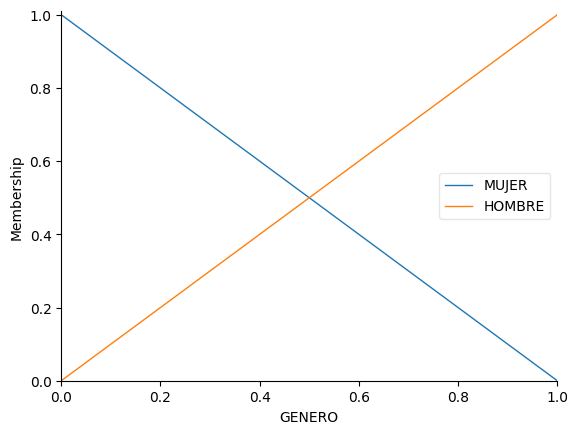

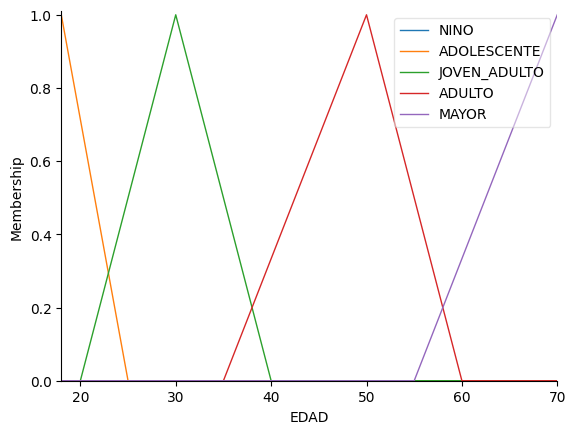

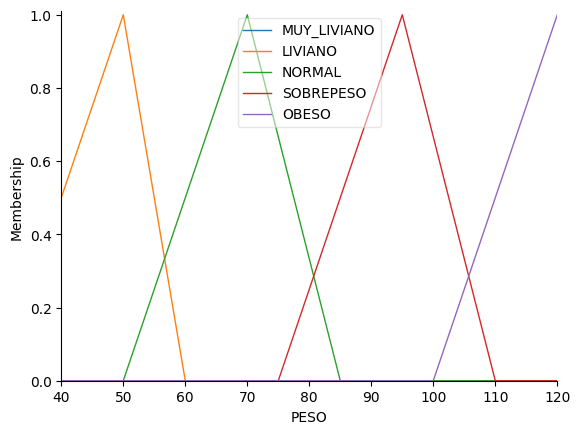

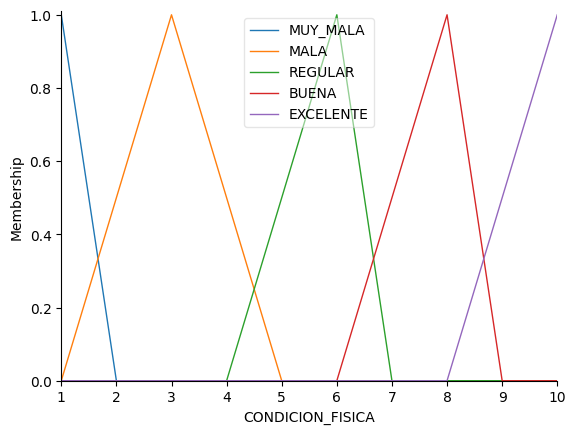

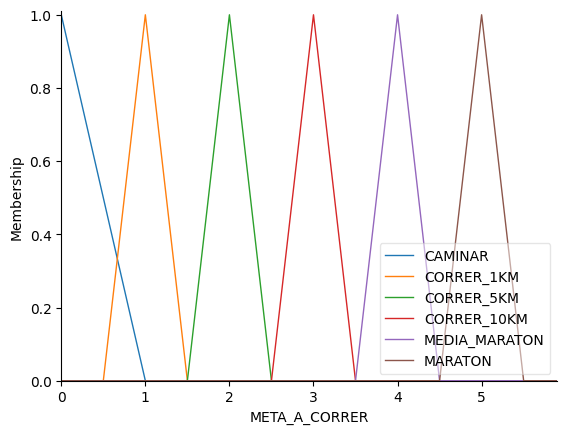

In [29]:
# Cell 8: Visualization (Optional)
# You can visualize any of the membership functions like this:
genero.view()
edad.view()
peso.view()
condicion_fisica.view()
meta_a_correr.view()